<a href="https://colab.research.google.com/github/ihilesen/Kaggle-data-analysis/blob/main/Bank_marketing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank_mrkt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/bank (1).csv')
print(bank_mrkt.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [ ]:
print(bank_mrkt.info())
bank_mrkt['job'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


12

In [ ]:
bank_mrkt['deposit'].isin(['yes'])

0         True
1         True
2         True
3         True
4         True
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: deposit, Length: 11162, dtype: bool

In [ ]:
job = bank_mrkt['job'].value_counts()

Text(0.5, 1.0, 'Jobs')

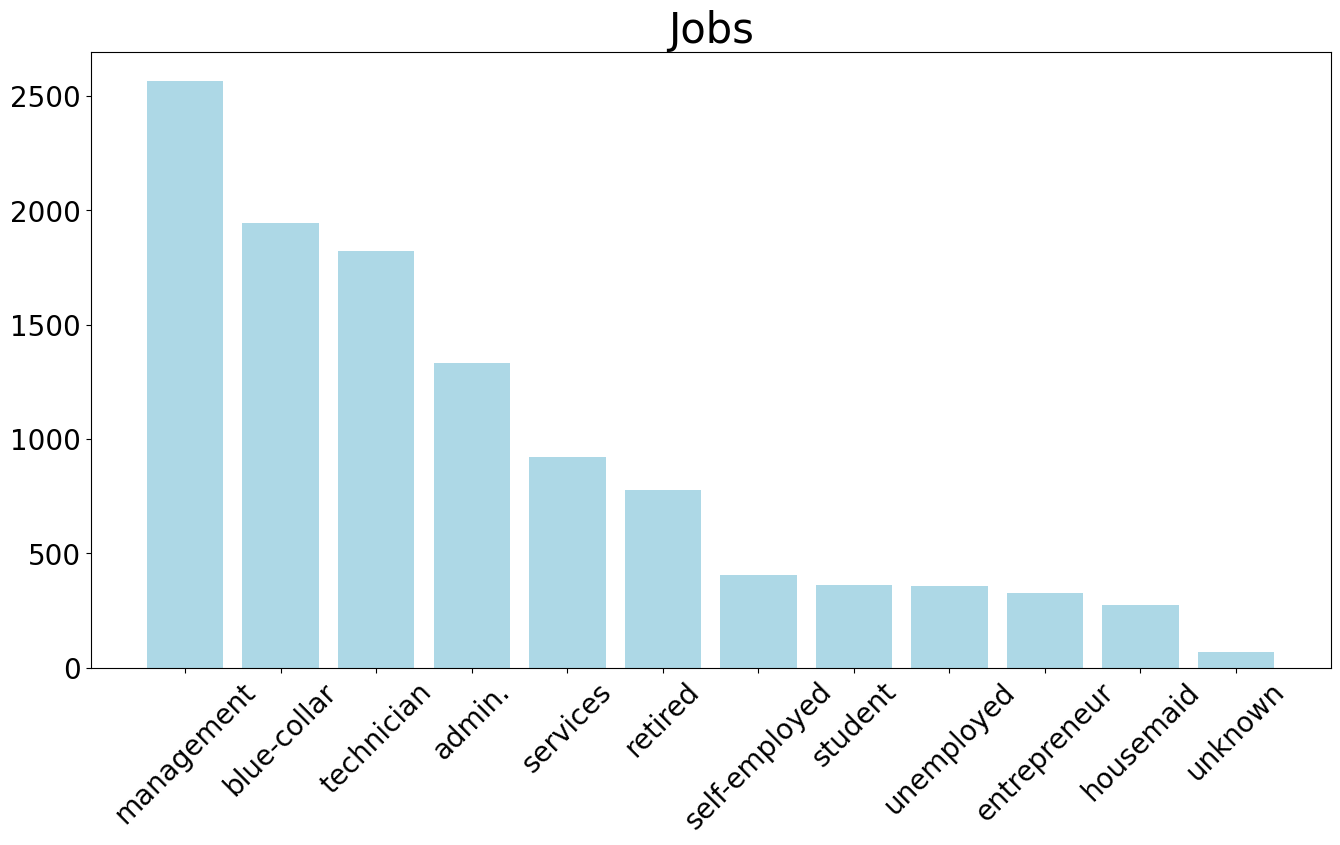

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.bar(job.index,job.values,color='lightblue')
plt.xticks(size=20,rotation=45)
plt.yticks(size=20)
plt.title('Jobs',size=30)
# fig.savefig('img/unbalanced.png')

In [11]:
bank_mrkt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
#frequency of deposits
bank_mrkt['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

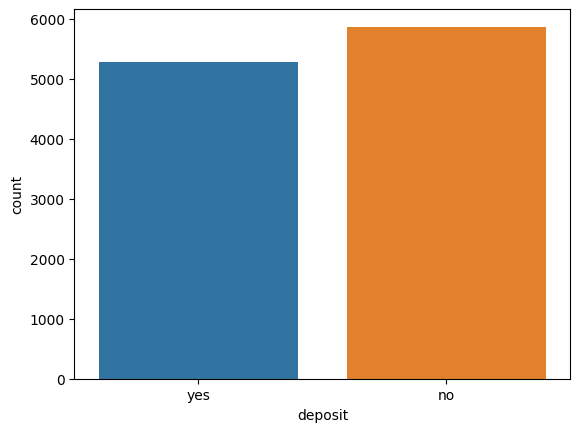

In [13]:
# Plotting the 'deposit' frequency
sns.countplot(data = bank_mrkt, x='deposit')
plt.show()

In [14]:
#Normalizing the frequency table of 'deposit' variable
bank_mrkt['deposit'].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [17]:
#Analysing the 'job' variable
#Frequency table
bank_mrkt['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

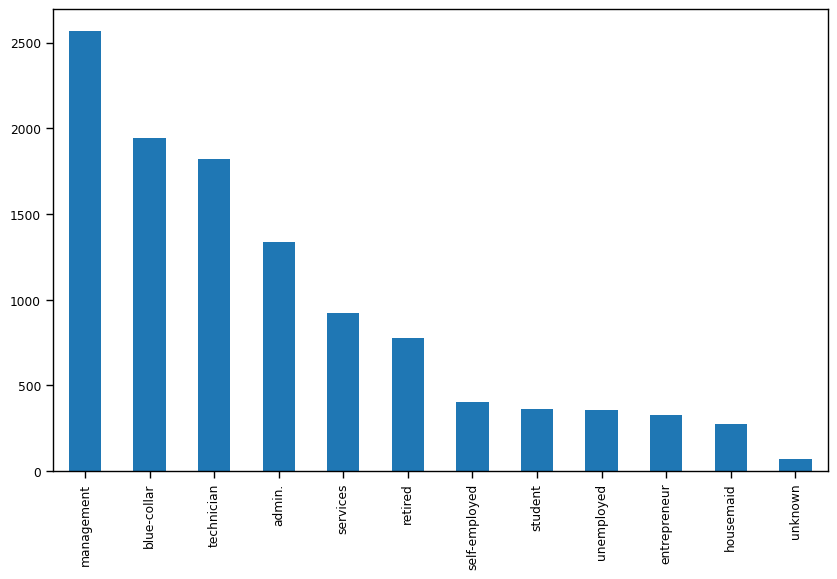

In [18]:
# Plotting the job frequency table
sns.set_context('paper')
bank_mrkt['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [19]:
#Analysis of 'marital' status
bank_mrkt['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

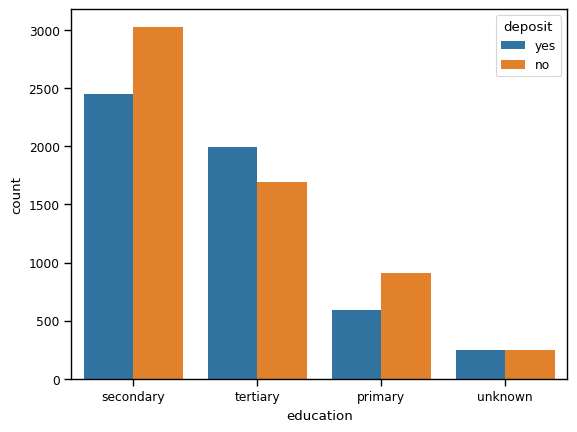

In [23]:
sns.countplot(data=bank_mrkt, x='education', hue = 'deposit')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

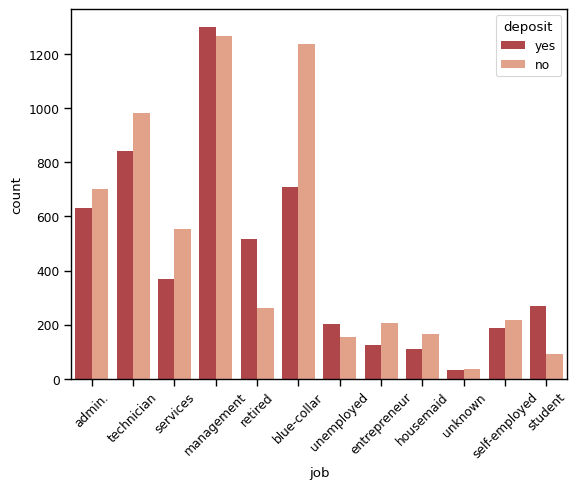

In [33]:
sns.set_palette('RdBu')
sns.countplot(data=bank_mrkt, x='job', hue='deposit')
plt.xticks(rotation = 45)

<ipython-input-37-4028b890e026>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_mrkt['age'])


<Axes: xlabel='age', ylabel='Density'>

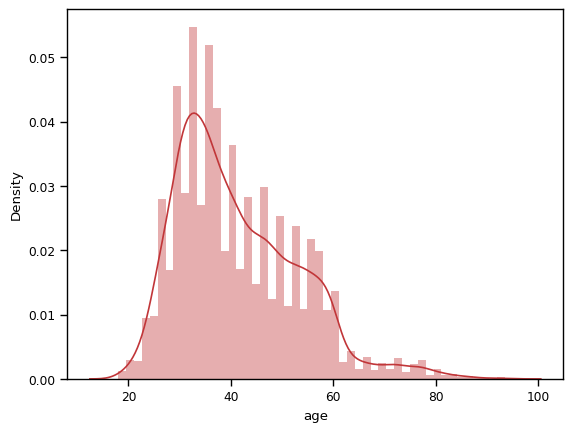

In [37]:
sns.distplot(bank_mrkt['age'])

In [38]:
#Bivariate Analysis
#job vs subscribed
print(pd.crosstab(bank_mrkt['job'],bank_mrkt['deposit']))

deposit          no   yes
job                      
admin.          703   631
blue-collar    1236   708
entrepreneur    205   123
housemaid       165   109
management     1265  1301
retired         262   516
self-employed   218   187
services        554   369
student          91   269
technician      983   840
unemployed      155   202
unknown          36    34


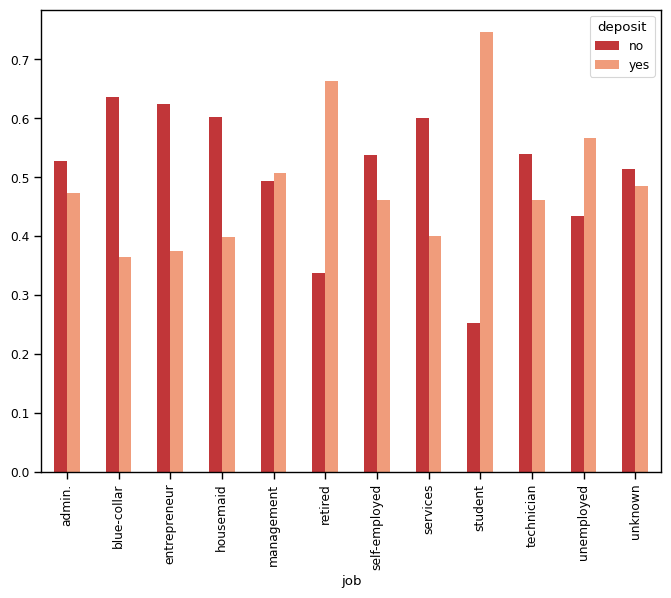

In [41]:
job = pd.crosstab(bank_mrkt['job'],bank_mrkt['deposit'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=False,figsize=(8,6));

In [42]:
#Marital status vs subscribed
pd.crosstab(bank_mrkt['marital'], bank_mrkt['deposit'])

deposit,no,yes
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


In [43]:
marital = pd.crosstab(bank_mrkt['marital'], bank_mrkt['deposit'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

deposit,no,yes
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


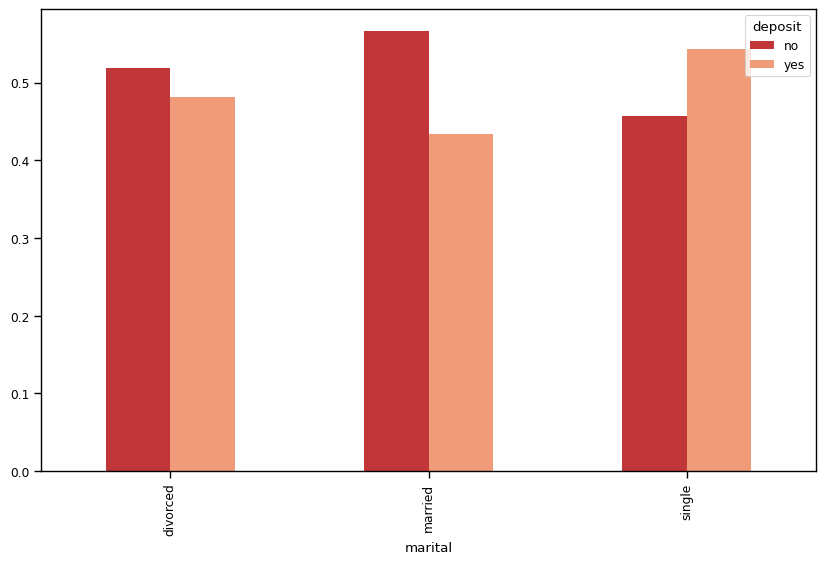

In [45]:
marital_norm.plot.bar(stacked=False, figsize=(10,6));

In [46]:
#default vs subscription
pd.crosstab(bank_mrkt['default'], bank_mrkt['deposit'])

deposit,no,yes
default,,
no,5757,5237
yes,116,52


In [47]:
dflt = pd.crosstab(bank_mrkt['default'], bank_mrkt['deposit'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

deposit,no,yes
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


<Axes: xlabel='default'>

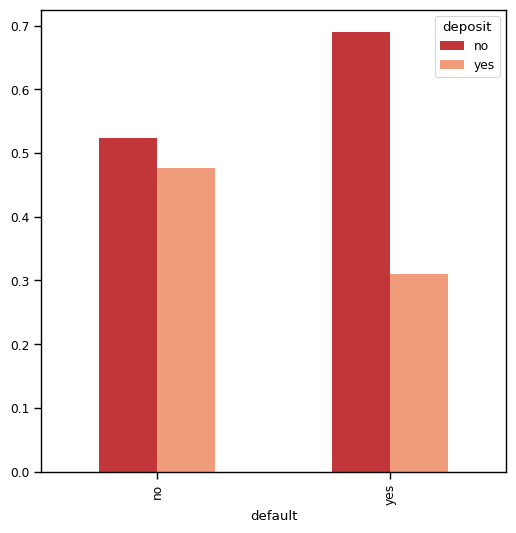

In [49]:
dflt_norm.plot.bar(stacked=False, figsize=(6,6))

In [51]:
# Converting the target variables into 0s and 1s
bank_mrkt['deposit'].replace('no', 0,inplace=True)
bank_mrkt['deposit'].replace('yes', 1,inplace=True)
bank_mrkt['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [54]:
bmc = bank_mrkt.corr()

<ipython-input-54-50ef69e027af>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bmc = bank_mrkt.corr()


<Axes: >

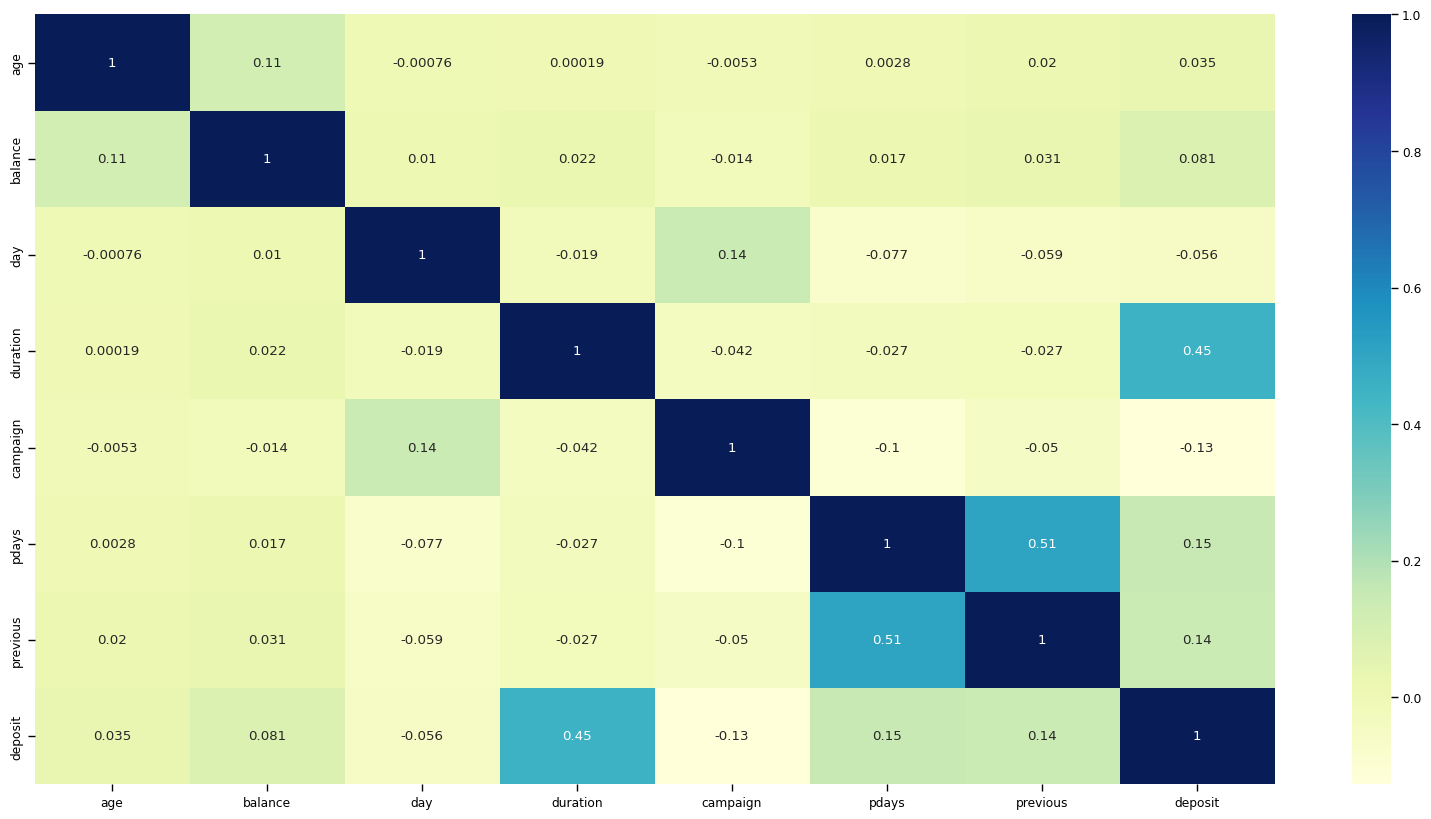

In [55]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(bmc, annot=True, cmap='YlGnBu')

In [56]:
target = bank_mrkt['deposit']
train = bank_mrkt.drop('deposit', axis=1)
#generating dummy values on the train dataset
train = pd.get_dummies(bank_mrkt)
train.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [62]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [63]:
#creating an object of logistic regression model
lreg = LogisticRegression()

In [64]:
#fitting the data into the model
lreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
#Making predictions on the validation set
pred = lreg.predict(X_val)

In [82]:
#Checking the accuracy of our model
from sklearn.metrics import accuracy_score

In [83]:
#Calculating the accuracy score
accuracy_score(y_val,pred)

0.9664128974473802

In [84]:
#Using Decision Tree algorithm to for dealing with non-linearity

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [85]:
#creating an object of Decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [86]:
#fitting the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [87]:
#making predictions on the validation set
predict = clf.predict(X_val)
predict

array([0, 1, 0, ..., 1, 0, 0])

In [88]:
#Calculating the accuracy
accuracy_score(y_val,predict)

1.0

In [90]:
#Let's now make the prediction on test dataset

test = pd.get_dummies(bank_mrkt)
test.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [91]:
test_pred = clf.predict(test)
test_pred

array([1, 1, 1, ..., 0, 0, 0])

In [92]:
#Finally, we will save these predictions into a csv file.

submissions = pd.DataFrame()

In [93]:
submissions['balance'] = test['balance']
submissions['deposit'] = test_pred

In [94]:
submissions['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [95]:
#Since the target variable is yes or no, we will convert 1 and 0 in the predictions to yes and no respectively.

submissions['deposit'].replace(0,'no',inplace=True)
submissions['deposit'].replace(1,'yes',inplace=True)

In [96]:
submissions['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [98]:
submissions.to_csv('submission file.csv', header=True, index=False)

In [74]:
!pip install matplotlib-venn

In [75]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [76]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [77]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.6 MB/s eta 0:00:00
